# Linear Regression With One Variable

In [155]:
import os
import matplotlib.pyplot as plt
import numpy as np
RESTURANT_PATH = os.path.join("datasets", "resturant")

In [156]:
import pandas as pd
def load_resturant_data(resturant_path=RESTURANT_PATH): 
    csv_path = os.path.join(resturant_path, "ex1data1.txt") 
    print(csv_path)
    return pd.read_csv(csv_path)

In [157]:
data = load_resturant_data()
data.head()

datasets/resturant/ex1data1.txt


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Scatter Plot of Training Data')

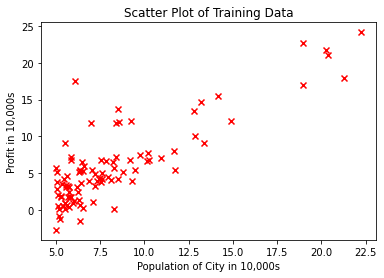

In [158]:
x = data['Population']
y = data['Profit']
m = len(y)
plt.scatter(x,y, c='red', marker='x')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter Plot of Training Data')

In [159]:
x = np.append(np.ones([m,1]), x.values.reshape(m,1), axis=1)#Append bias term to x and reshape x to mx1 matrix
y = y.values.reshape(m,1)

theta = np.zeros([2,1])

def computeCost(x, y, theta):
    '''
    This function takes in the X and y matrices as well as the 
    initial theta values(coefficients) and returns the cost(error of             
    prediction)
    '''
    m = len(y) #this is the length of the training set
    h = x.dot(theta) #the hypothesis
    j = 1/(2*m) *(np.sum((h - y)**2)) #the cost function
    return j #return the cost
cost = computeCost(x,y,theta) #Call the function and pass in values for X, y, and theta to compute the cost.
print(cost)
    

32.072733877455676


In [160]:
iter = 1500 ## Number of iterations
alpha = 0.01 ## Learning rate

def gradientDescent(x, y, theta, alpha, iter):
    '''
    This function takes in the X and y matrices, the initial theta
    values(coefficients), the learning rate, and the number of 
    iterations. The output will be the a new set of coefficient of 
    the linear regression (theta), optimized for making predictions.
    '''  
    j_history = [] #array for storing the cost value for each iteration
    m = len(y) #this is the lenght of the training set
    
    for i in range(iter): #loop for 1500 iterations
        h = x.dot(theta) #the hypothesis
        theta = theta - (alpha/m) * (x.T.dot(h-y)) #Gradient descent function
        
        j_history.append(computeCost(x,y,theta)) #append the cost to the j history array
    return theta, j_history #return the final values of theta and the j_hisstory
        

In [161]:
new_theta, j_history = gradientDescent(x,y,theta,alpha,iter)
print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [162]:
new_cost = computeCost(x,y,new_theta)
print(new_cost)

4.483388256587725


Text(0.5, 1.0, 'Training Data with Linear Regression Fit')

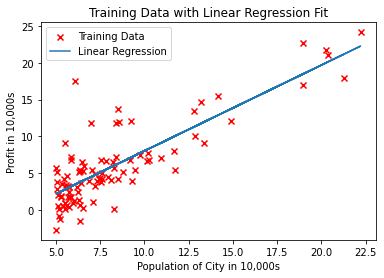

In [163]:
plt.scatter(x[:,1].reshape([m,1]), y, c='red', marker='x', label='Training Data')
plt.plot(x[:,1].reshape([m,1]), np.dot(x, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')

In [164]:
#now we define a function for predicting profit giving population
first_city = 3500
second_city = 70000

def prediction(x, new_theta):
    '''
    This function takes in population and predicts profit.
    '''
    pred = np.dot(x,new_theta) * 10000 #use the new coefficients
    return pred #the prediction

predict1 = (prediction(([1,3.5]), (new_theta)))
predict2 = (prediction(([1,7]), (new_theta)))

print(f'For a population of {first_city} people, profit will be {predict1[0]}')
print(f'For a population of {second_city} people, profit will be {predict2[0]}')
    

For a population of 3500 people, profit will be 4519.7678677017675
For a population of 70000 people, profit will be 45342.45012944714
